In [13]:
from ipywidgets import interactive
from ipywidgets import interactive, FloatSlider
from IPython.display import display

In [14]:
x = FloatSlider(value=20, descripition='x')
print ("Interactive Sliders!")
display(x)

Interactive Sliders!


In [15]:
x.value = 80

## ipywidgets

In [24]:
from ipywidgets import widgets  

In [25]:
t = TextWidget(value="Hi mom!")

NameError: name 'TextWidget' is not defined

In [26]:
b = ButtonWidget(descipition = "Leave")

NameError: name 'ButtonWidget' is not defined

In [30]:
text = widgets.Text()
display(text)

def handle_submit(sender):
    print(text.value)
    
text.on_submit(handle_submit)    

superman
superman vs batman


In [32]:
button = widgets.Button(description="Click Me!")
display(button)

def on_button_clicked(b):
    print("Button clicked.")
    
button.on_click(on_button_clicked)    

Button clicked.
Button clicked.
Button clicked.


In [33]:
def f(x):
    print(x)
interact(f, x=10)    

NameError: name 'interact' is not defined

In [34]:
from Ipython.html.widgets import *

ImportError: No module named 'Ipython'

Domain gave error on pinging
Domain gave error on pinging
Domain gave error on pinging


<IPython.core.display.Javascript object>


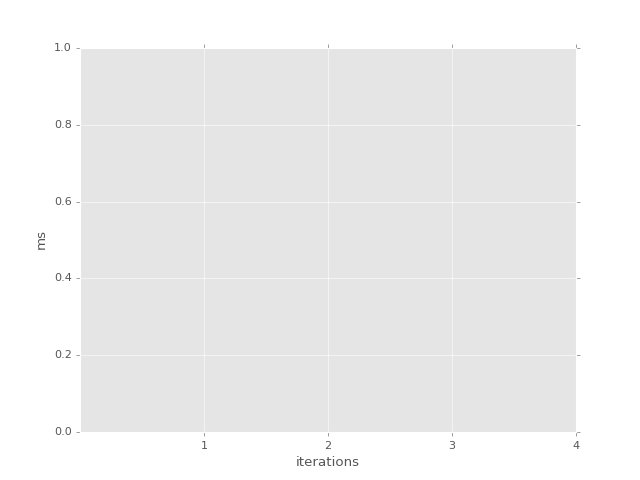

Domain gave error on pinging


In [39]:
%matplotlib notebook
import pandas as pd  
import matplotlib.pyplot as plt  
from ipywidgets import *  
from IPython.display import display  
from IPython.html import widgets  
plt.style.use('ggplot')

NUMBER_OF_PINGS = 4

#displaying the text widget
text = widgets.Text(description="Domain to ping", width=200)  
display(text)

#preparing the plot 
data = pd.DataFrame()  
x = range(1,NUMBER_OF_PINGS+1)  
plots = dict()  
fig, ax = plt.subplots()  
plt.xlabel('iterations')  
plt.ylabel('ms')  
plt.xticks(x)  
plt.show()

#preparing a container to put in created checkbox per domain
checkboxes = []  
cb_container = widgets.HBox()  
display(cb_container)

#add button that updates the graph based on the checkboxes
button = widgets.Button(description="Update the graph")

#function to deal with the added domain name
def handle_submit(sender):  
    #a part of the magic inside python : pinging
    res = !ping -c {NUMBER_OF_PINGS} {text.value}
    hits = res.grep('64 bytes').fields(-2).s.replace("time=","").split()
    if len(hits) == 0:
        print ("Domain gave error on pinging")
    else:
         #rebuild plot based on ping result
        data[text.value] = hits
        data[text.value] = data[text.value].astype(float)
        plots[text.value], = ax.plot(x, data[text.value], label=text.value)
        plt.legend()
        plt.draw()
        #add a new checkbox for the new domain
        checkboxes.append(widgets.Checkbox(description = text.value, value=True, width=90))
        cb_container.children=[i for i in checkboxes]
        if len(checkboxes) == 1:
            display(button)

#function to deal with the checkbox update button       
def on_button_clicked(b):  
    for c in cb_container.children:
        if not c.value:
            plots[c.description].set_visible(False)
        else:
            plots[c.description].set_visible(True)
    plt.legend()
    plt.draw()

button.on_click(on_button_clicked)  
text.on_submit(handle_submit)  
plt.show()  

In [40]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def plot(amplitude, color):
    fig, ax = plt.subplots(figsize=(4, 3),
                           subplot_kw={'axisbg':'#EEEEEE',
                                       'axisbelow':True})
    ax.grid(color='w', linewidth=2, linestyle='solid')
    x = np.linspace(0, 10, 1000)
    ax.plot(x, amplitude * np.sin(x), color=color,
            lw=5, alpha=0.4)
    ax.set_xlim(0, 10)
    ax.set_ylim(-1.1, 1.1)
    return fig

In [41]:
from ipywidgets import StaticInteract, RangeWidget, RadioWidget

StaticInteract(plot,
               amplitude=RangeWidget(0.1, 1.0, 0.1),
               color=RadioWidget(['blue', 'green', 'red']))

ImportError: cannot import name 'StaticInteract'

In [43]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#from IPython.html.widgets import interact

#plt.close('all')

def logiter(r, x0, t):
    y = []
    x = x0
    fig=plt.figure()
    for i in range(t):
        x = r*x*(1-x)
        y.append(x)

    plt.plot(y)
    return fig
from ipywidgets import StaticInteract, RangeWidget, RadioWidget

StaticInteract(logiter,
               r=RadioWidget([1, 2, 4]),
               t=RangeWidget(1, 10, 1),)

ImportError: cannot import name 'StaticInteract'

In [44]:
from IPython.display import Image
Image(url='http://i.imgur.com/l9Yzfcs.gif')

In [45]:
from math import pi as PI
from math import sin, cos
import random

from plotly.widgets import GraphWidget
from plotly.graph_objs import *
import plotly.plotly as py
import plotly.tools as tls

from IPython.html import widgets 
from IPython.display import display, clear_output

root = 12

ImportError: No module named 'plotly'

In [46]:
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, gridplot, output_file, show

output_file("brushing.html")

x = list(range(-20, 21))
y0 = [abs(xx) for xx in x]
y1 = [xx**2 for xx in x]

# create a column data source for the plots to share
source = ColumnDataSource(data=dict(x=x, y0=y0, y1=y1))

TOOLS = "box_select,lasso_select,help"

# create a new plot and add a renderer
left = figure(tools=TOOLS, width=300, height=300, title=None)
left.circle('x', 'y0', source=source)

# create another new plot and add a renderer
right = figure(tools=TOOLS, width=300, height=300, title=None)
right.circle('x', 'y1', source=source)

p = gridplot([[left, right]])

show(p)